<a href="https://colab.research.google.com/github/koki-takada-1/quantification_type_2/blob/main/quantification_type_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import sympy as sp
sp.init_printing()

In [3]:
df1 = pd.read_excel('/content/店舗評価データ.xlsx') #データ読込
l1=list(df1)[2:] #カラム名リスト作成
num_of_categories=df1[l1].nunique(dropna=False) #各アイテムごとのカテゴリ数
print(num_of_categories)
df1

立地特性         3
100m以内競合店    2
昼食時店舗前通行量    2
dtype: int64


,群,店舗評価,立地特性,100m以内競合店,昼食時店舗前通行量
0,1,1,1,2,1
1,1,1,2,1,1
2,1,1,1,1,1
3,1,1,3,1,2
4,1,1,2,1,2
5,2,2,3,2,1
6,2,2,2,2,2
7,2,2,3,2,1
8,2,2,2,2,2
9,2,2,1,2,2


In [5]:
df1=df1.drop(columns=['店舗評価'])#店舗評価を目的変数とするので、店舗評価のカラムを削除
df1

,群,立地特性,100m以内競合店,昼食時店舗前通行量
0,1,1,2,1
1,1,2,1,1
2,1,1,1,1
3,1,3,1,2
4,1,2,1,2
5,2,3,2,1
6,2,2,2,2
7,2,3,2,1
8,2,2,2,2
9,2,1,2,2


In [6]:
df2=pd.get_dummies(df1,columns=l1) #ワンホットエンコーディング
l2=list(df2)[1:] #カラム名リスト作成
num_of_reaction = [] #反応数(1の数)
for i in l2:
    num_of_reaction_bool = df2[i]==1 
    num_of_reaction.append(num_of_reaction_bool.sum())
print(num_of_reaction)
df2

[3, 4, 5, 5, 7, 5, 7]


,群,立地特性_1,立地特性_2,立地特性_3,100m以内競合店_1,100m以内競合店_2,昼食時店舗前通行量_1,昼食時店舗前通行量_2
0,1,1,0,0,0,1,1,0
1,1,0,1,0,1,0,1,0
2,1,1,0,0,1,0,1,0
3,1,0,0,1,1,0,0,1
4,1,0,1,0,1,0,0,1
5,2,0,0,1,0,1,1,0
6,2,0,1,0,0,1,0,1
7,2,0,0,1,0,1,1,0
8,2,0,1,0,0,1,0,1
9,2,1,0,0,0,1,0,1


In [7]:
cnt=0
for i in num_of_categories:
  cnt+=i
  df2.pop(l2[cnt-1]) #アイテム(説明変数の末尾カテゴリ削除)

l3=list(df2)[1:] #各説明変数の末尾カテゴリを削除したdfのカラムリスト作成
g=df2['群'].nunique(dropna=False) #群が何個あるか g=群数

df2

,群,立地特性_1,立地特性_2,100m以内競合店_1,昼食時店舗前通行量_1
0,1,1,0,0,1
1,1,0,1,1,1
2,1,1,0,1,1
3,1,0,0,1,0
4,1,0,1,1,0
5,2,0,0,0,1
6,2,0,1,0,0
7,2,0,0,0,1
8,2,0,1,0,0
9,2,1,0,0,0


In [8]:
x_s = df2.to_numpy() #データフレームから行列を取り出す
print(x_s)
x = x_s[0:,1:] #群の名前が書かれた列を抜く
print(x)
x_m = np.mean(x,axis=0).reshape(len(l3),1) #各列の平均をとった列ベクトル(全体平均ベクトル)作成
print(x_m)
x_m_t = x_m.T #転置
print(x_m_t)

[[1 1 0 0 1]
 [1 0 1 1 1]
 [1 1 0 1 1]
 [1 0 0 1 0]
 [1 0 1 1 0]
 [2 0 0 0 1]
 [2 0 1 0 0]
 [2 0 0 0 1]
 [2 0 1 0 0]
 [2 1 0 0 0]
 [2 0 0 1 0]
 [2 0 0 0 0]]
[[1 0 0 1]
 [0 1 1 1]
 [1 0 1 1]
 [0 0 1 0]
 [0 1 1 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 0 0]]
[[0.25      ]
 [0.33333333]
 [0.41666667]
 [0.41666667]]
[[0.25       0.33333333 0.41666667 0.41666667]]


In [9]:
x_dev=x
x_dev=x_dev.astype(float)
print(x_dev)

for i in range(x_m.size):
    x_dev[0:,i:i+1]-=x_m[i]

print("偏差データ行列：",x_dev)#ダミー変数データの各列に対して、その列の平均に-1を掛けたものを加える
x_dev_t=x_dev.T
print("偏差データ転置行列：",x_dev_t)

[[1. 0. 0. 1.]
 [0. 1. 1. 1.]
 [1. 0. 1. 1.]
 [0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]
偏差データ行列： [[ 0.75       -0.33333333 -0.41666667  0.58333333]
 [-0.25        0.66666667  0.58333333  0.58333333]
 [ 0.75       -0.33333333  0.58333333  0.58333333]
 [-0.25       -0.33333333  0.58333333 -0.41666667]
 [-0.25        0.66666667  0.58333333 -0.41666667]
 [-0.25       -0.33333333 -0.41666667  0.58333333]
 [-0.25        0.66666667 -0.41666667 -0.41666667]
 [-0.25       -0.33333333 -0.41666667  0.58333333]
 [-0.25        0.66666667 -0.41666667 -0.41666667]
 [ 0.75       -0.33333333 -0.41666667 -0.41666667]
 [-0.25       -0.33333333  0.58333333 -0.41666667]
 [-0.25       -0.33333333 -0.41666667 -0.41666667]]
偏差データ転置行列： [[ 0.75       -0.25        0.75       -0.25       -0.25       -0.25
  -0.25       -0.25       -0.25        0.75       -0.25       -0.25      ]
 [-0.33333333  0.66666667 -0.33333333 -0.33

In [10]:
#全体変動行列T
T=np.dot(x_dev_t,x_dev)
T

array([[ 2.25      , -1.        , -0.25      ,  0.75      ],
       [-1.        ,  2.66666667,  0.33333333, -0.66666667],
       [-0.25      ,  0.33333333,  2.91666667, -0.08333333],
       [ 0.75      , -0.66666667, -0.08333333,  2.91666667]])

In [11]:
mv=[] #群別平均の列ベクトルを格納するリスト 
mv_t=[] #群別平均の列ベクトルの転置(行ベクトル)を格納するリスト
for i in range(g):
    d = df2[df2['群']==i+1]
    display(d)
    m = d.to_numpy()[0:,1:]
    mv.append(np.mean(m,axis=0).reshape(len(l3),1)) #群単位での各列(カテゴリ)の平均すなわち群別平均
    mv_t.append(np.mean(m,axis=0).reshape(len(l3),1).T) #転置
print(mv)
print(mv_t)

h=[] #(群別平均-全体平均)の列ベクトルを格納するリスト

for i in range(len(mv)):
    h.append(mv[i]-x_m)

print(h)




,群,立地特性_1,立地特性_2,100m以内競合店_1,昼食時店舗前通行量_1
0,1,1,0,0,1
1,1,0,1,1,1
2,1,1,0,1,1
3,1,0,0,1,0
4,1,0,1,1,0


,群,立地特性_1,立地特性_2,100m以内競合店_1,昼食時店舗前通行量_1
5,2,0,0,0,1
6,2,0,1,0,0
7,2,0,0,0,1
8,2,0,1,0,0
9,2,1,0,0,0
10,2,0,0,1,0
11,2,0,0,0,0


[array([[0.4],
       [0.4],
       [0.8],
       [0.6]]), array([[0.14285714],
       [0.28571429],
       [0.14285714],
       [0.28571429]])]
[array([[0.4, 0.4, 0.8, 0.6]]), array([[0.14285714, 0.28571429, 0.14285714, 0.28571429]])]
[array([[0.15      ],
       [0.06666667],
       [0.38333333],
       [0.18333333]]), array([[-0.10714286],
       [-0.04761905],
       [-0.27380952],
       [-0.13095238]])]


In [12]:
b1=h[0]
b2=h[0].T
for i in range(g):
    d = df2[df2['群']==i+1]
    for j in range(len(d)):
        if i==0 and j==0:
            continue
        b1 = np.append(b1,h[i],axis=1)
        b2 = np.append(b2,h[i].T,axis=0)
     
print(b1)
print(b2)
B = np.dot(b1,b2) #(群別平均-全体平均)のベクトルの2乗を個体数個足したもの　:=群間行列B

print("群間行列:",B)

[[ 0.15        0.15        0.15        0.15        0.15       -0.10714286
  -0.10714286 -0.10714286 -0.10714286 -0.10714286 -0.10714286 -0.10714286]
 [ 0.06666667  0.06666667  0.06666667  0.06666667  0.06666667 -0.04761905
  -0.04761905 -0.04761905 -0.04761905 -0.04761905 -0.04761905 -0.04761905]
 [ 0.38333333  0.38333333  0.38333333  0.38333333  0.38333333 -0.27380952
  -0.27380952 -0.27380952 -0.27380952 -0.27380952 -0.27380952 -0.27380952]
 [ 0.18333333  0.18333333  0.18333333  0.18333333  0.18333333 -0.13095238
  -0.13095238 -0.13095238 -0.13095238 -0.13095238 -0.13095238 -0.13095238]]
[[ 0.15        0.06666667  0.38333333  0.18333333]
 [ 0.15        0.06666667  0.38333333  0.18333333]
 [ 0.15        0.06666667  0.38333333  0.18333333]
 [ 0.15        0.06666667  0.38333333  0.18333333]
 [ 0.15        0.06666667  0.38333333  0.18333333]
 [-0.10714286 -0.04761905 -0.27380952 -0.13095238]
 [-0.10714286 -0.04761905 -0.27380952 -0.13095238]
 [-0.10714286 -0.04761905 -0.27380952 -0.13095

In [13]:
t_inv = np.linalg.inv(T) #全体変動行列Tの逆行列

t_inv

array([[ 0.56222222,  0.18222222,  0.02444444, -0.10222222],
       [ 0.18222222,  0.46222222, -0.03555556,  0.05777778],
       [ 0.02444444, -0.03555556,  0.34888889, -0.00444444],
       [-0.10222222,  0.05777778, -0.00444444,  0.38222222]])

In [14]:
T_iB = np.dot(t_inv,B) # Tの逆行列をBに左から掛けた　積
print(T_iB)


[[0.112      0.04977778 0.28622222 0.13688889]
 [0.07085714 0.03149206 0.18107937 0.08660317]
 [0.17257143 0.07669841 0.44101587 0.21092063]
 [0.07314286 0.03250794 0.18692063 0.08939683]]


In [15]:
#固有値問題
a = np.linalg.eig(T_iB)
# 固有値を表示
print("固有値 {}\n".format(a[0]))
print("固有ベクトル {}\n".format(a[1]))

固有値 [ 1.11022302e-16  6.73904762e-01 -4.02714048e-17 -3.31665771e-18]

固有ベクトル [[-0.94190207 -0.48790045 -0.03168347 -0.48117742]
 [ 0.11877545 -0.30867171  0.36838248 -0.79957308]
 [ 0.28927569 -0.75176497 -0.44242564  0.17804295]
 [ 0.12260691 -0.31862886  0.81703736  0.31217285]]



In [16]:
for i in range(T_iB.shape[0]):
    T_iB[i][i] -= a[0][np.argmax(a[0])] #固有値(相関比)が最大のものを対角成分からひく

T_iB

array([[-0.56190476,  0.04977778,  0.28622222,  0.13688889],
       [ 0.07085714, -0.6424127 ,  0.18107937,  0.08660317],
       [ 0.17257143,  0.07669841, -0.23288889,  0.21092063],
       [ 0.07314286,  0.03250794,  0.18692063, -0.58450794]])

In [17]:
#固有ベクトルの要素を未知数とする連立方程式を解く
left=T_iB[0:T_iB.shape[0]-1,:T_iB.shape[1]-1] #左辺
right=-1*T_iB[0:T_iB.shape[0]-1,T_iB.shape[1]-1:] #右辺
display(left)
display(right)

print(np.linalg.solve(left,right))
v=np.linalg.solve(left,right) #固有ベクトル

array([[-0.56190476,  0.04977778,  0.28622222],
       [ 0.07085714, -0.6424127 ,  0.18107937],
       [ 0.17257143,  0.07669841, -0.23288889]])

array([[-0.13688889],
       [-0.08660317],
       [-0.21092063]])

[[1.53125 ]
 [0.96875 ]
 [2.359375]]


In [18]:
v=np.append(v,1.0000)
v #固有ベクトル

array([1.53125 , 0.96875 , 2.359375, 1.      ])

In [19]:
c = np.sqrt(len(df1)/(v @ T @ v.T))
c #固有ベクトルの長さ

In [20]:
a = c*v
a #固有ベクトル

array([1.07619636, 0.68085892, 1.65822092, 0.70282211])

In [21]:
cnt = 0
for i in num_of_categories:
    cnt += i
    a = np.insert(a,[cnt-1],0.0000)
a #説明変数末尾のカテゴリーは0としたので、その部分に0を挿入

array([1.07619636, 0.68085892, 0.        , 1.65822092, 0.        ,
       0.70282211, 0.        ])

In [22]:
#加重平均
kaj=[]
cnt=0
for i in num_of_categories:
    s = 0
    for j in range(i):
        s += a[cnt+j]*num_of_reaction[cnt+j]
    
    kaj.append(s/len(df2))
    a[cnt:cnt+i] -= (s/len(df2))
    cnt += i
    
print("加重平均：",kaj)
print("カテゴリウェイト：",a)

加重平均： [0.4960020639499203, 0.6909253842844834, 0.292842546981503]
カテゴリウェイト： [ 0.5801943   0.18485686 -0.49600206  0.96729554 -0.69092538  0.40997957
 -0.29284255]


In [23]:
#レンジ
range_of_explanatory=[]
cnt=0
for i in num_of_categories:
    dum_list=[]
    for j in range(i):
        dum_list.append(a[cnt+j])
    range_of_explanatory.append(dum_list)
    cnt += i
print(range_of_explanatory)
for i in range(len(range_of_explanatory)):
    range_of_explanatory[i]=max(range_of_explanatory[i])-min(range_of_explanatory[i])
print("\n")
range_dict= dict(zip(l1,range_of_explanatory))
ranking = sorted(range_dict.items(), key = lambda x:x[1], reverse=True)
print(range_dict)
print("\n")
print(ranking)

[[0.5801942962071025, 0.1848568577820736, -0.4960020639499203], [0.9672955379982768, -0.6909253842844834], [0.4099795657741042, -0.292842546981503]]


{'立地特性': 1.0761963601570228, '100m以内競合店': 1.6582209222827602, '昼食時店舗前通行量': 0.7028221127556072}


[('100m以内競合店', 1.6582209222827602), ('立地特性', 1.0761963601570228), ('昼食時店舗前通行量', 0.7028221127556072)]


In [24]:
!pip install japanize_matplotlib  # japanize_matplotlibのインストール

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 5.1 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=c0ceca08a4419fd1e4893d8772a59a7f1a3e56b253749f4517a8532bbe5e918b
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


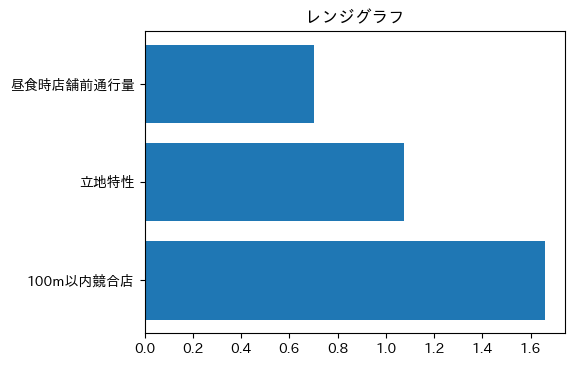

In [25]:
import matplotlib.pyplot as plt
import japanize_matplotlib  
vari=[]
ran=[]
for i in range(len(ranking)):
    vari.append(ranking[i][0])
    ran.append(ranking[i][1])
fig,ax=plt.subplots(dpi=100)
fig.subplots_adjust(left=0.2)

ax.set_title('レンジグラフ')

ax.barh(vari,ran)
plt.show();